In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/greenhouse-gas-emissions-projections-of-eea/GHG_projections_2023_EEA_incl_pivots.csv
/kaggle/input/greenhouse-gas-emissions-projections-of-eea/GHG_projections_2023_EEA_incl_pivots.xlsx


In [4]:
df = pd.read_csv("/kaggle/input/greenhouse-gas-emissions-projections-of-eea/GHG_projections_2023_EEA_incl_pivots.csv")

**Greenhouse Gas Emissions Projections of EEA** veri seti, Avrupa Çevre Ajansı (EEA) tarafından sağlanan sera gazı emisyon projeksiyonlarını içerir. Bu veri seti, ülkelerin geçmiş ve gelecek yıllar için sera gazı emisyonlarına ilişkin tahminlerini sunar ve sürdürülebilir kalkınma ile çevre koruma hedeflerine yönelik veriler sağlar.Veri setinin temel amacı, Avrupa'daki farklı ülkelerin geçmiş ve gelecekteki sera gazı emisyonlarını gözlemlemek ve analiz etmektir.

In [5]:
df.head(10)
#veri setindeki ilk 10 veriyi listeleyerek bir ön izleme yapıp fikir oluşturma

,CountryCode,Year,SubmissionYear,Category,Scenario,Gas,Reported Value,RY calibration,Gapfilled
0,RO,2021,2023,Total excluding LULUCF,WEM,Total,111005.828102,NaN,111005.8
1,RO,2021,2023,Total including LULUCF,WEM,Total,77459.520501,NaN,77459.5
2,RO,2021,2023,1. Energy,WEM,Total,73482.939858,NaN,73482.9
3,RO,2021,2023,1.A.1. Energy industries,WEM,Total,17112.677538,NaN,17112.7
4,RO,2021,2023,1.A.2. Manufacturing industries and construction,WEM,Total,14911.470404,NaN,14911.5
5,RO,2021,2023,1.A.3. Transport,WEM,Total,19168.858502,NaN,19168.9
6,RO,2021,2023,1.A.3.a. Domestic aviation,WEM,Total,135.044960,NaN,135.0
7,RO,2021,2023,1.A.3.b. Road transportation,WEM,Total,18423.557570,NaN,18423.6
8,RO,2021,2023,1.A.3.c. Railways,WEM,Total,447.519682,NaN,447.5
9,RO,2021,2023,1.A.3.d. Domestic navigation,WEM,Total,146.281318,NaN,146.3


In [6]:
df.tail(10)
#enson 10 değeri

,CountryCode,Year,SubmissionYear,Category,Scenario,Gas,Reported Value,RY calibration,Gapfilled
96529,EU27,2050,2023,Total excluding LULUCF,WOM,Total,NaN,NaN,2.297470e+05
96530,EU27,2050,2023,Total including LULUCF,WAM,ESR,NaN,NaN,1.220484e+06
96531,EU27,2050,2023,Total including LULUCF,WAM,ETS,NaN,NaN,5.954329e+05
96532,EU27,2050,2023,Total including LULUCF,WAM,Total,NaN,NaN,1.588807e+06
96533,EU27,2050,2023,Total including LULUCF,WEM,ESR,NaN,NaN,1.425115e+06
96534,EU27,2050,2023,Total including LULUCF,WEM,ETS,NaN,NaN,6.873521e+05
96535,EU27,2050,2023,Total including LULUCF,WEM,Total,NaN,NaN,1.922711e+06
96536,EU27,2050,2023,Total including LULUCF,WOM,ESR,NaN,NaN,1.752720e+04
96537,EU27,2050,2023,Total including LULUCF,WOM,ETS,NaN,NaN,9.687828e+03
96538,EU27,2050,2023,Total including LULUCF,WOM,Total,NaN,NaN,2.234014e+05


**1.CountryCode/Ülke kodu:**
Ülkelerin ISO kodlarını veya benzeri bir kısaltmayı içerir. Her ülke ya da bölge için belirli bir kod atanmıştır.

**2.Year/Yıllar:** Emisyon verisinin veya tahminin hangi yıla ait olduğunu belirtir.

**3.SubmissionYear/teslim-rapor yılı:**
İlgili verilerin hangi yıl raporlandığını ya da gönderildiğini gösterir.

**4.Category/Gaz kategorisi:**
Sera gazı emisyonlarının hangi kategoriye girdiğini belirtir. Bu kategori, belirli bir sektör (örneğin enerji, sanayi, tarım) ya da genel bir politika çerçevesi olabilir.

**5.Scenario/projeksiyon senaryoları:**
Farklı projeksiyon senaryolarını belirtir. Bu, "business-as-usual" (mevcut politikalara göre devam) veya "reduction" (emisyon azaltımı) gibi çeşitli senaryoları temsil edebilir.

**6.Gas:**
Hangi sera gazının raporlandığını belirtir. Bu gazlar ETS,ESR veya diğer sera gazları olabilir.

**7.Reported Value/Rapor değer:**
İlgili yıl ve senaryoya ait sera gazı emisyon değerini içerir. Bu, genellikle ton cinsinden verilen bir sayısal değerdir.

**8.RY calibration (Reported Year Calibration)/Yıllara göre kalibrasyon:**
Rapor edilen yılların kalibrasyonunu gösterir. Bu, geçmişteki verilere dayalı olarak yapılan düzeltmeleri ifade edebilir.

**9.Gapfilled:**
Eksik verilerin modelleme veya tahmin yöntemleri kullanılarak ne oranda doldurulduğunu gösterir. 

In [7]:
df.info()
#veri noktaları non-null olduğu için nontype hatası almayız null olsaydı düzenlememiz gerkliydi
#verilerin sayısı,tipi gibi bilgiler verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96539 entries, 0 to 96538
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CountryCode     96539 non-null  object 
 1   Year            96539 non-null  int64  
 2   SubmissionYear  96539 non-null  int64  
 3   Category        96539 non-null  object 
 4   Scenario        96539 non-null  object 
 5   Gas             96539 non-null  object 
 6   Reported Value  45227 non-null  float64
 7   RY calibration  0 non-null      float64
 8   Gapfilled       96539 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.6+ MB


**Reported Value:**
Bu sütunda eksik veriler mevcut. Toplamda 45,227 veri noktası mevcut, ancak 51,312 giriş için veri eksik.

**RY calibration:**
Sütunda hiçbir değer mevcut değil o sebeple kullanmaya gerek yok.

In [8]:
df = df.drop('RY calibration', axis=1)
#gereksiz görünen sütunu sildim

In [9]:
df

,CountryCode,Year,SubmissionYear,Category,Scenario,Gas,Reported Value,Gapfilled
0,RO,2021,2023,Total excluding LULUCF,WEM,Total,111005.828102,1.110058e+05
1,RO,2021,2023,Total including LULUCF,WEM,Total,77459.520501,7.745950e+04
2,RO,2021,2023,1. Energy,WEM,Total,73482.939858,7.348290e+04
3,RO,2021,2023,1.A.1. Energy industries,WEM,Total,17112.677538,1.711270e+04
4,RO,2021,2023,1.A.2. Manufacturing industries and construction,WEM,Total,14911.470404,1.491150e+04
...,...,...,...,...,...,...,...,...
96534,EU27,2050,2023,Total including LULUCF,WEM,ETS,NaN,6.873521e+05
96535,EU27,2050,2023,Total including LULUCF,WEM,Total,NaN,1.922711e+06
96536,EU27,2050,2023,Total including LULUCF,WOM,ESR,NaN,1.752720e+04
96537,EU27,2050,2023,Total including LULUCF,WOM,ETS,NaN,9.687828e+03


In [10]:
df.isnull().sum()
#datasetteki eksik verileri ve toplamını döndürür

CountryCode           0
Year                  0
SubmissionYear        0
Category              0
Scenario              0
Gas                   0
Reported Value    51312
Gapfilled             0
dtype: int64

In [11]:
df.duplicated().sum()
#datasetteki tekrar eden verileri döndürdüm

0

In [12]:
df.describe()
#sayısal sütunların belirli istatiksel değerlerini verir

,Year,SubmissionYear,Reported Value,Gapfilled
count,96539.000000,96539.0,45227.000000,9.653900e+04
mean,2035.315634,2023.0,13386.328854,2.465846e+04
std,8.648137,0.0,44203.779861,1.339538e+05
min,2021.000000,2023.0,-63781.141740,-3.321057e+05
25%,2028.000000,2023.0,69.008396,8.979967e+01
50%,2035.000000,2023.0,982.087927,1.271159e+03
75%,2043.000000,2023.0,6565.346714,9.304690e+03
max,2050.000000,2023.0,798429.029287,3.405857e+06


In [13]:
df.describe(include='object')
#sadece kategorik değerlerin istatiksel değerini verir

,CountryCode,Category,Scenario,Gas
count,96539,96539,96539,96539
unique,31,30,3,3
top,EU27,Total excluding LULUCF,WEM,Total
freq,5620,5691,45786,49518


In [14]:
# Mod değerini hesapla
mode_value = df['Reported Value'].mode()[0]

# Eksik verileri mod ile doldur
df['Reported Value'].fillna(mode_value, inplace=True)

Burada ortalama ile doldurmayı denedim fakat makine öğrenmesi kısmında zaman aldı ve çok fazla değer kaybı oldu o sebeple burayı tekrar düzenledim.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96539 entries, 0 to 96538
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CountryCode     96539 non-null  object 
 1   Year            96539 non-null  int64  
 2   SubmissionYear  96539 non-null  int64  
 3   Category        96539 non-null  object 
 4   Scenario        96539 non-null  object 
 5   Gas             96539 non-null  object 
 6   Reported Value  96539 non-null  float64
 7   Gapfilled       96539 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.9+ MB


In [60]:
!pip install kaggle/datasets/merveacarss/pycountry-24.6.1-py3-none-any.whl
import pycountry

def iso2den_iso3e(code):
    try:
        country = pycountry.countries.get(alpha_2=code) 
        return country.alpha_3  
    except:
        return code  # Eğer hata olursa orijinal kodu geri döndür

# DataFrame'deki CountryCode kolonunu ISO-3 formatına dönüştür
df['CountryCode'] = df['CountryCode'].apply(iso2den_iso3e)
#colabda almadım ama burada hata aldım 

Processing ./kaggle/datasets/merveacarss/pycountry-24.6.1-py3-none-any.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/kaggle/working/kaggle/datasets/merveacarss/pycountry-24.6.1-py3-none-any.whl'



ModuleNotFoundError: No module named 'pycountry'

In [16]:
df["CountryCode"].unique()

array(['RO', 'CZ', 'FI', 'MT', 'PL', 'PT', 'SE', 'SI', 'SK', 'HR', 'CY',
       'IE', 'IT', 'NO', 'FR', 'CH', 'LV', 'AT', 'EL', 'ES', 'BE', 'LU',
       'DK', 'NL', 'HU', 'DE', 'IS', 'LT', 'EE', 'BG', 'EU27'],
      dtype=object)

In [31]:
len(df["CountryCode"].unique())

31

In [32]:
df["Category"].unique()

array(['Total excluding LULUCF', 'Total including LULUCF', '1. Energy',
       '1.A.1. Energy industries',
       '1.A.2. Manufacturing industries and construction',
       '1.A.3. Transport', '1.A.3.a. Domestic aviation',
       '1.A.3.b. Road transportation', '1.A.3.c. Railways',
       '1.A.3.d. Domestic navigation', '1.A.3.e. Other transportation',
       '1.A.4. Other sectors', '1.A.5. Other',
       '1.B. Fugitive emissions from fuels', '2. Industrial processes',
       '3. Agriculture',
       '4. Land Use, Land-Use Change and Forestry (LULUCF, reported emissions and removals) (9)',
       '4.A. Forest land', '4.B. Cropland', '4.C. Grassland',
       '4.D. Wetlands', '4.E. Settlements', '4.F. Other Land',
       '4.G. Harvested wood products', '5. Waste', 'IB.Aviation',
       'IB.Navigation', 'Indirect CO2 (if available) (10)',
       '1.C. CO2 transport and storage', '4.H. Other'], dtype=object)

In [33]:
len(df["Category"].unique())

30

In [34]:
df["Gas"].unique()

array(['Total', 'ETS', 'ESR'], dtype=object)

Bu koddaki amacım verilerimde elimde ne var 10 yıl içerisinde ülkelerdeki emisyon oranı nedir bunu görselleştirip ona göre yol izlemek

In [37]:
import matplotlib.pyplot as plt
import plotly.express as px
# 2024-2034 yılları arası ve en yüksek emisyon değerine sahip ilk 5 ülke)
df_filtered = df[(df['Year'] >= 2024) & (df['Year'] <= 2034)]
top_countries = df.groupby('CountryCode')['Reported Value'].sum().nlargest(5).index
df_filtered = df_filtered[df_filtered['CountryCode'].isin(top_countries)]

fig = px.line(df_filtered, 
              x='Year', 
              y='Reported Value', 
              color='CountryCode', 
              title='2025-2035 Yılları Arasında Ülke Bazlı Emisyonlar',
              template='plotly_dark')

fig.show()

ISO bir kodlama standardı ülke isimlerini ona göre kodluyoruz burada belirttim ve dünya haritası üzerinde yıllara göre ülkelerdeki emisyon oranını renklerdirerek ve derecelendirerek inceleyebilme durumu mevcut

In [42]:

fig = px.choropleth(df, 
                    locations="CountryCode", 
                    color="Reported Value", 
                    locationmode="ISO-3",  
                    animation_frame="Year", 
                    ) 


fig.update_layout(title="Yıllara Göre Ülke Bazlı Emisyon Dağılımı")


fig.show()

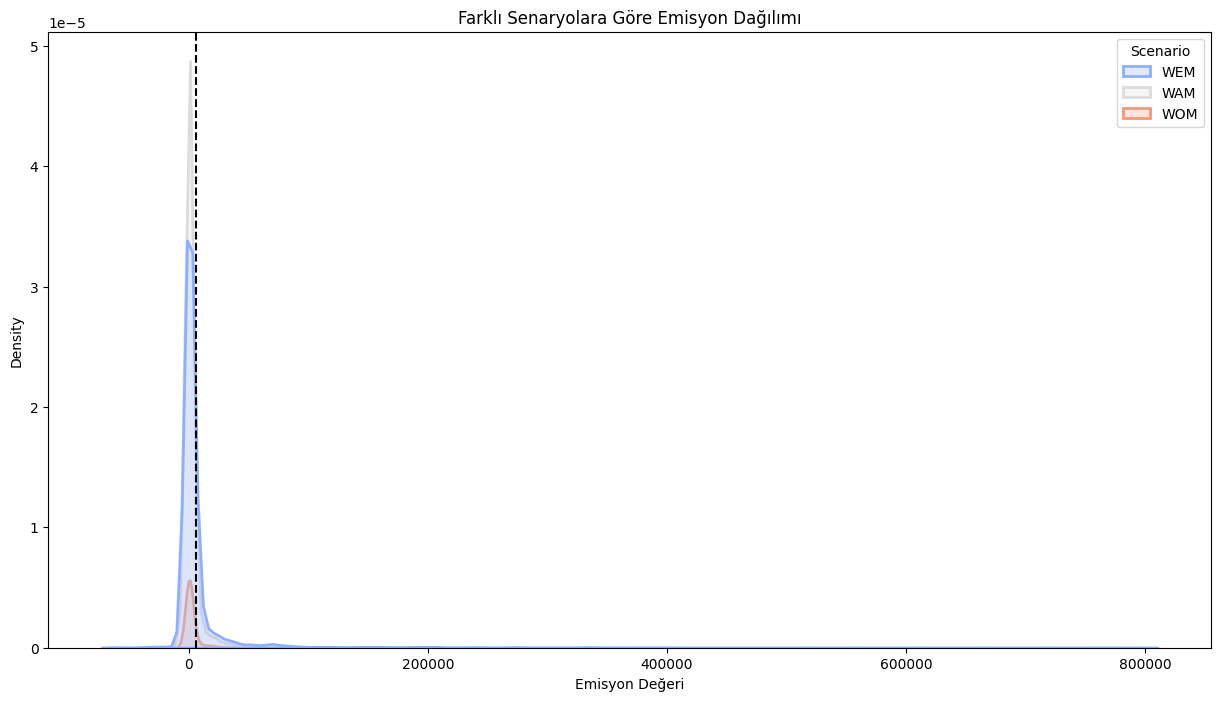

In [48]:
plt.figure(figsize=(15, 8))
sns.kdeplot(x=df['Reported Value'], hue=df['Scenario'], fill=True, linewidth=2, palette="coolwarm")
plt.title("Farklı Senaryolara Göre Emisyon Dağılımı")
plt.axvline(x=df['Reported Value'].mean(), color='black', linestyle='--')
plt.xlabel('Emisyon Değeri')
plt.show()


In [49]:
import pandas as pd
import plotly.express as px

# Kategori başına toplam emisyon değerlerini hesaplama
category_totals = df.groupby('Category')['Reported Value'].sum().reset_index()


fig = px.pie(category_totals, values='Reported Value', names='Category', title='Kategorilere Göre Toplam Emisyon Dağılımı')
fig.show()

In [50]:
fig = px.bar(df.sort_values(by='Year'), 
             x='Year', 
             y='Reported Value', 
             color='Category', 
             barmode='stack', 
             template='plotly_dark', 
             title='Yıllara Göre Kategorilere Göre Yığılmış Emisyon Dağılımı')

fig.show()

Makine Öğrenmesi kısmı ilk olarak gözetimli öğrenme 

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Veri ön işleme (Label Encoding ve Normalleştirme)
label_encoder = LabelEncoder()
for col in ['CountryCode', 'Category', 'Scenario', 'Gas']:
    df[col] = label_encoder.fit_transform(df[col])

scaler = MinMaxScaler()
df[['Year', 'SubmissionYear', 'Reported Value', 'Gapfilled']] = scaler.fit_transform(df[['Year', 'SubmissionYear', 'Reported Value', 'Gapfilled']])

# Bağımsız ve bağımlı değişkenlerin ayrılması
X = df.drop(columns=['Reported Value'])
y = df['Reported Value']

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# kNN modelini eğitme 
knn = KNeighborsRegressor(n_neighbors=5)  # Sabit n_neighbors değeri
#bu değeri bulmak için öncesinde 1-20 arası değerlendirip en iyi sonucu vereni seçtim
knn.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = knn.predict(X_test)

# Modeli değerlendirme regresyon modeli olduğu için ona göre yaptım knnclass. çok yüksek değer kybı vardı o sebple bu algoritmayı seçtim.
mse = mean_squared_error(y_test, y_pred)
print(f"Ortalama Kare Hata (MSE): {mse}")

Ortalama Kare Hata (MSE): 0.0002743454099094338


**KNeighborsRegressor (Gözetimli Öğrenme): **

Bu model, "Reported Value" adlı değişkeni tahmin etmek için kullanıldı. Model, diğer değişkenleri (CountryCode, Year, SubmissionYear, Category, Scenario, Gas, Gapfilled) inceleyerek gelecekteki"Reported Value" değerini tahmin etmeye çalışır.

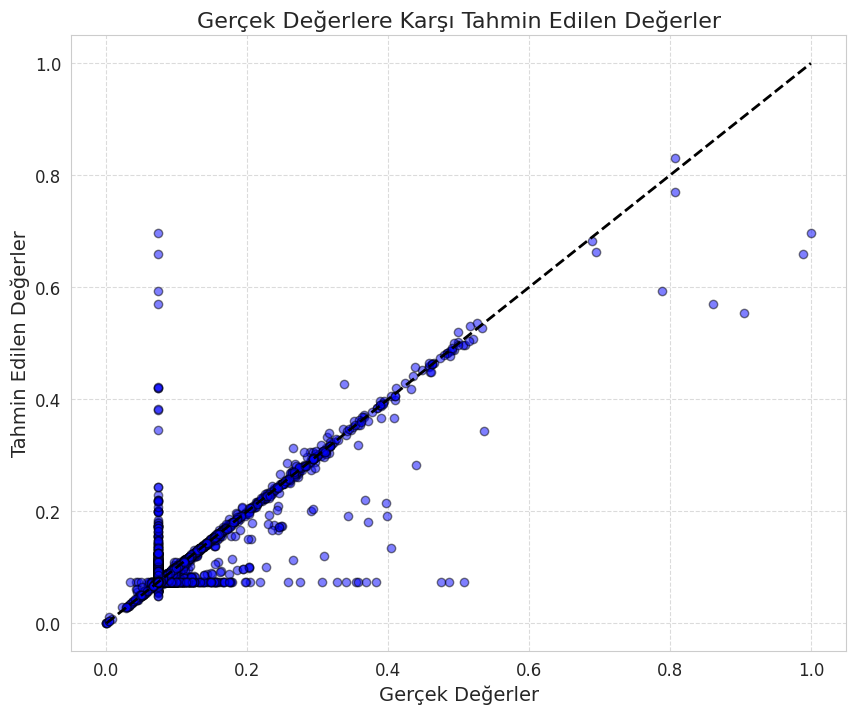

In [52]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))


plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='black')

# 45 derecelik referans çizgisi eekledim amacım yakınlığı görmek
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)


plt.xlabel("Gerçek Değerler", fontsize=14)
plt.ylabel("Tahmin Edilen Değerler", fontsize=14)
plt.title("Gerçek Değerlere Karşı Tahmin Edilen Değerler", fontsize=16)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
print("Çapraz Doğrulama Skorları:", -scores)
#performans değerlendirmesi yaptım.

Çapraz Doğrulama Skorları: [0.00261496 0.00028357 0.00082574 0.0010818  0.00194199]


**K-Means Kümeleme (Gözetimsiz Öğrenme):**
Bu modeli, verileri benzerliklerine göre gruplandırmak için kullandım. "Reported Value", "Year", "SubmissionYear" ve "Gapfilled" değişkenlerini kullanarak verileri 3 farklı kümeye ayırdım.

Amacım,benzer emisyon özelliklerine sahip ülkeleri gruplandırmak, farklı emisyon trendlerini belirlemek veya aykırı değerleri tespit etmek için kullanılabilmekti.

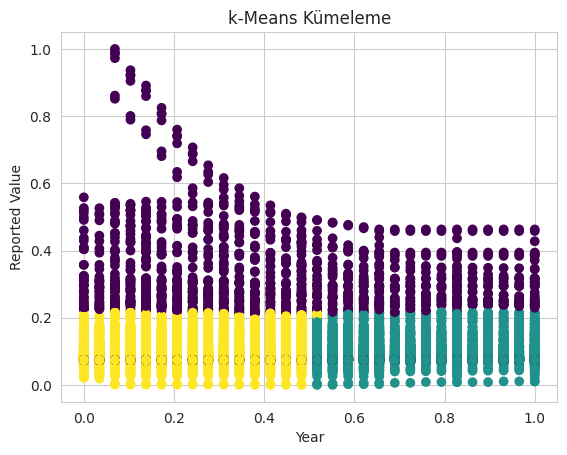

         CountryCode      Year  SubmissionYear   Category  Scenario       Gas  \
Cluster                                                                         
0          14.762946  0.424884             0.0  18.978711  0.631185  1.101841   
1          15.304518  0.758093             0.0  12.334021  0.579102  1.197428   
2          15.428424  0.241495             0.0  12.296161  0.582612  1.206427   

         Reported Value  Gapfilled  
Cluster                             
0              0.271596   0.247226  
1              0.077274   0.092411  
2              0.078223   0.092902  


In [54]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


numerical_features = ['Year', 'SubmissionYear', 'Reported Value', 'Gapfilled']
X = df[numerical_features]

# Verileri standartlaştırdım diğer türlü kayıp çoktu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# model oluşturup eğittim
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# kümeleri etiketlendirdim
labels = kmeans.labels_

# veri kümesine ekledim
df['Cluster'] = labels


plt.scatter(df['Year'], df['Reported Value'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Reported Value')
plt.title('k-Means Kümeleme')
plt.show()

#gruplandırarak her küme için inceleme yaptım
print(df.groupby('Cluster').mean())